# Import

In [2]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.layers import Dense
from keras.models import Model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Prepare data

In [5]:
# unzip data and load them
! unzip "/content/drive/My Drive/deep learning/hw5/time-series.zip" 

Archive:  /content/drive/My Drive/deep learning/hw5/time-series.zip
  inflating: 4.csv                   
  inflating: 5.csv                   
  inflating: 6.csv                   
  inflating: 7.csv                   
  inflating: 8.csv                   
  inflating: 9.csv                   
  inflating: 10.csv                  
  inflating: 11.csv                  
  inflating: 12.csv                  
  inflating: 13.csv                  
  inflating: 14.csv                  
  inflating: 15.csv                  
  inflating: 16.csv                  
  inflating: 17.csv                  
  inflating: 18.csv                  
  inflating: 19.csv                  
  inflating: 20.csv                  
  inflating: 21.csv                  
  inflating: 22.csv                  
  inflating: 23.csv                  
  inflating: 24.csv                  
  inflating: 25.csv                  
  inflating: 26.csv                  
  inflating: 27.csv                  
  inflating: 28.csv 

In [6]:
import os

datasets = []
for sample_file in os.listdir():
  if sample_file.endswith(".csv"):
    datasets.append(pd.read_csv(sample_file))

In [18]:
datasets[0]

,timestamp,value,label
0,1,5.860000,0
1,2,5.948333,0
2,3,5.916111,0
3,4,5.465833,0
4,5,5.773611,0
...,...,...,...
1456,1457,5.767778,0
1457,1458,5.855833,0
1458,1459,5.991111,0
1459,1460,5.962500,0


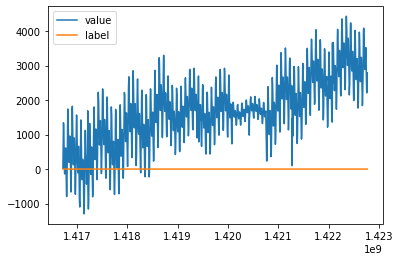

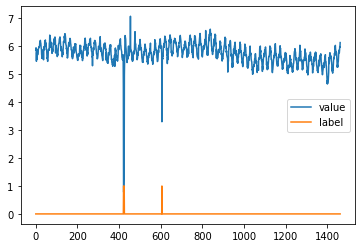

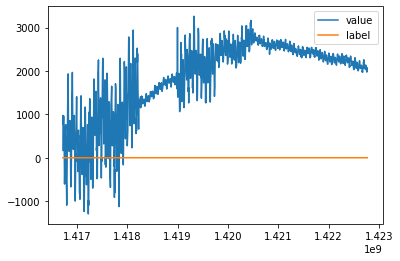

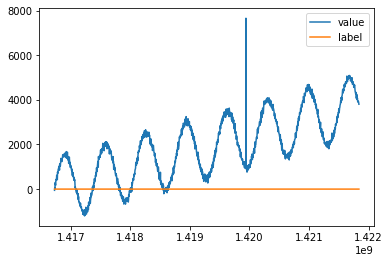

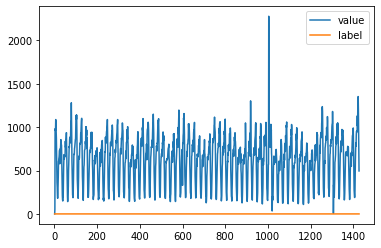

<Figure size 432x288 with 0 Axes>

In [7]:
# show chart of 5 dataset(csv file) randomly
randoms_ds = [5, 17, 30, 47, 71]

for ds_ind in randoms_ds:
  plt.plot(datasets[ds_ind]["timestamp"], datasets[ds_ind]["value"], label="value")
  plt.plot(datasets[ds_ind]["timestamp"], datasets[ds_ind]["label"], label="label")
  plt.legend()
  plt.figure()

In [7]:
# split data to train and test
df = pd.concat(datasets, ignore_index=True)
X = df["value"]
X = X.values.reshape(-1, 1, 1)
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Metric functions

In [8]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

In [19]:
# Simple
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
17737/17737 [==============================] - 89s 5ms/step - loss: 0.0795 - f1_score_m: 0.0363 - val_loss: 0.0770 - val_f1_score_m: 0.0668
Epoch 2/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0770 - f1_score_m: 0.0787 - val_loss: 0.0767 - val_f1_score_m: 0.1005
Epoch 3/10
17737/17737 [==============================] - 78s 4ms/step - loss: 0.0762 - f1_score_m: 0.0832 - val_loss: 0.0748 - val_f1_score_m: 0.0774
Epoch 4/10
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0751 - f1_score_m: 0.0866 - val_loss: 0.0743 - val_f1_score_m: 0.1009
Epoch 5/10
17737/17737 [==============================] - 89s 5ms/step - loss: 0.0748 - f1_score_m: 0.0927 - val_loss: 0.0742 - val_f1_score_m: 0.0779
Epoch 6/10
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0748 - f1_score_m: 0.0978 - val_loss: 0.0745 - val_f1_score_m: 0.1191


In [20]:
# LSTM
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0754 - f1_score_m: 0.0050 - val_loss: 0.0696 - val_f1_score_m: 0.0402
Epoch 2/10
17737/17737 [==============================] - 81s 5ms/step - loss: 0.0695 - f1_score_m: 0.0455 - val_loss: 0.0690 - val_f1_score_m: 0.0662
Epoch 3/10
17737/17737 [==============================] - 82s 5ms/step - loss: 0.0685 - f1_score_m: 0.0662 - val_loss: 0.0665 - val_f1_score_m: 0.0650
Epoch 4/10
17737/17737 [==============================] - 81s 5ms/step - loss: 0.0680 - f1_score_m: 0.0778 - val_loss: 0.0670 - val_f1_score_m: 0.0895
Epoch 5/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0676 - f1_score_m: 0.0841 - val_loss: 0.0668 - val_f1_score_m: 0.0908
Epoch 6/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0673 - f1_score_m: 0.0878 - val_loss: 0.0679 - val_f1_score_m: 0.0874


In [21]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0742 - f1_score_m: 0.0400 - val_loss: 0.0679 - val_f1_score_m: 0.0899
Epoch 2/10
17737/17737 [==============================] - 81s 5ms/step - loss: 0.0678 - f1_score_m: 0.0934 - val_loss: 0.0665 - val_f1_score_m: 0.1153
Epoch 3/10
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0673 - f1_score_m: 0.1029 - val_loss: 0.0665 - val_f1_score_m: 0.1072
Epoch 4/10
17737/17737 [==============================] - 86s 5ms/step - loss: 0.0671 - f1_score_m: 0.1052 - val_loss: 0.0668 - val_f1_score_m: 0.1132
Epoch 5/10
17737/17737 [==============================] - 100s 6ms/step - loss: 0.0670 - f1_score_m: 0.1061 - val_loss: 0.0671 - val_f1_score_m: 0.1125
Epoch 6/10
17737/17737 [==============================] - 85s 5ms/step - loss: 0.0668 - f1_score_m: 0.1058 - val_loss: 0.0664 - val_f1_score_m: 0.1087


# 4. Preprocces data to get better performance

In [39]:
# Preprocces method 1 = MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train.reshape(-1,1)).reshape(-1,1,1)
X_test = min_max_scaler.transform(X_test.reshape(-1,1)).reshape(-1,1,1)

In [33]:
# Preprocces method 2 = StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train.reshape(-1,1))
X_test = standard_scaler.transform(X_test.reshape(-1,1))

In [47]:
# Train 3 models again
# Simple
model = keras.Sequential()
model.add(layers.SimpleRNN(8, input_shape=(1, 1)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0810 - f1_score_m: 0.0390 - val_loss: 0.0782 - val_f1_score_m: 0.0773
Epoch 2/10
17737/17737 [==============================] - 95s 5ms/step - loss: 0.0776 - f1_score_m: 0.0869 - val_loss: 0.0782 - val_f1_score_m: 0.0901
Epoch 3/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0772 - f1_score_m: 0.0944 - val_loss: 0.0764 - val_f1_score_m: 0.0911
Epoch 4/10
17737/17737 [==============================] - 78s 4ms/step - loss: 0.0765 - f1_score_m: 0.0946 - val_loss: 0.0764 - val_f1_score_m: 0.1109
Epoch 5/10
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0763 - f1_score_m: 0.0947 - val_loss: 0.0760 - val_f1_score_m: 0.1109
Epoch 6/10
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0762 - f1_score_m: 0.0946 - val_loss: 0.0768 - val_f1_score_m: 0.1106


In [48]:
# LSTM
model = keras.Sequential()
model.add(layers.LSTM(16, input_shape=(1, 1)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True)
)

Epoch 1/15
17737/17737 [==============================] - 92s 5ms/step - loss: 0.0818 - f1_score_m: 0.0063 - val_loss: 0.0772 - val_f1_score_m: 0.0270
Epoch 2/15
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0766 - f1_score_m: 0.0509 - val_loss: 0.0765 - val_f1_score_m: 0.0654
Epoch 3/15
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0756 - f1_score_m: 0.0654 - val_loss: 0.0762 - val_f1_score_m: 0.1015
Epoch 4/15
17737/17737 [==============================] - 87s 5ms/step - loss: 0.0751 - f1_score_m: 0.0794 - val_loss: 0.0751 - val_f1_score_m: 0.0772
Epoch 5/15
17737/17737 [==============================] - 105s 6ms/step - loss: 0.0748 - f1_score_m: 0.0907 - val_loss: 0.0745 - val_f1_score_m: 0.1086
Epoch 6/15
17737/17737 [==============================] - 95s 5ms/step - loss: 0.0746 - f1_score_m: 0.0971 - val_loss: 0.0743 - val_f1_score_m: 0.1117
Epoch 7/15
17737/17737 [==============================] - 99s 6ms/step - loss: 0.0745 - f1_sc

In [49]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(16, input_shape=(1, 1)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True)
)

Epoch 1/15
17737/17737 [==============================] - 81s 4ms/step - loss: 0.0803 - f1_score_m: 0.0105 - val_loss: 0.0761 - val_f1_score_m: 0.0654
Epoch 2/15
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0757 - f1_score_m: 0.0758 - val_loss: 0.0749 - val_f1_score_m: 0.0909
Epoch 3/15
17737/17737 [==============================] - 94s 5ms/step - loss: 0.0748 - f1_score_m: 0.0934 - val_loss: 0.0744 - val_f1_score_m: 0.1050
Epoch 4/15
17737/17737 [==============================] - 83s 5ms/step - loss: 0.0746 - f1_score_m: 0.1004 - val_loss: 0.0742 - val_f1_score_m: 0.1131
Epoch 5/15
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0745 - f1_score_m: 0.1045 - val_loss: 0.0761 - val_f1_score_m: 0.0776
Epoch 6/15
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0744 - f1_score_m: 0.1062 - val_loss: 0.0743 - val_f1_score_m: 0.1317
Epoch 7/15
17737/17737 [==============================] - 80s 5ms/step - loss: 0.0743 - f1_sco

# 6. Train a self supervise model

In [9]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(1, 1), return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))

In [11]:
# compile and train the model
def predict_indicators(data):
    labels = list()
    samples = list()
    for i in range(len(data) - 1):
      tmp_samples = []
      for k in range(1):
        tmp_samples.append(data[i+k])
      samples.append(tmp_samples)
      labels.append(data[i + 1])
    return np.array(samples).reshape((-1, 1)), np.array(labels)



model.compile(
    optimizer='adam',
    loss='mse',
    metrics=(f1_score_m,)
)

X_train, y_train = predict_indicators(X_train.flatten())
X_test, y_test = predict_indicators(X_test.flatten())
print(X_train.shape, y_train.shape)

model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True)
)

(1135109, 1) (1135109,)
Epoch 1/2
17737/17737 [==============================] - 119s 6ms/step - loss: 32950743040.0000 - f1_score_m: 0.9498 - val_loss: 33112242176.0000 - val_f1_score_m: 0.9438
Epoch 2/2
17737/17737 [==============================] - 115s 6ms/step - loss: 32950208512.0000 - f1_score_m: 0.9441 - val_loss: 33111818240.0000 - val_f1_score_m: 0.9439


In [12]:
# delete last layer of model
new_model = tf.keras.Sequential()

for layer in model.layers[:-1]: 
  new_model.add(layer)

In [13]:
# freeze all remaining layers except the last one
for layer in new_model.layers[:-1]:
    layer.trainable = False

In [14]:
# add 2 dence layer to the model
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))

In [15]:
# train the main task(anomaly detection)
new_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)

new_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
17737/17737 [==============================] - 101s 5ms/step - loss: -2846013.0000 - f1_score_m: 0.9372 - val_loss: -7843802.5000 - val_f1_score_m: 0.9359
Epoch 2/10
17737/17737 [==============================] - 96s 5ms/step - loss: -16762892.0000 - f1_score_m: 0.9361 - val_loss: -27598514.0000 - val_f1_score_m: 0.9359
Epoch 3/10
17737/17737 [==============================] - 99s 6ms/step - loss: -42404932.0000 - f1_score_m: 0.9362 - val_loss: -58719584.0000 - val_f1_score_m: 0.9359
Epoch 4/10
17737/17737 [==============================] - 81s 5ms/step - loss: -79233144.0000 - f1_score_m: 0.9361 - val_loss: -101104088.0000 - val_f1_score_m: 0.9359
Epoch 5/10
17737/17737 [==============================] - 91s 5ms/step - loss: -126997600.0000 - f1_score_m: 0.9361 - val_loss: -155033536.0000 - val_f1_score_m: 0.9359
Epoch 6/10
17737/17737 [==============================] - 81s 5ms/step - loss: -186853232.0000 - f1_score_m: 0.9361 - val_loss: -220800080.0000 - val_f1_score_m: 0

# 7. Handle unbalanced data problem

In [16]:
# we can use downsampling when we have these anomality
from sklearn.utils import resample

df_maj = df[df["label"] == 0]
df_min = df[df["label"] != 0]
print(df_maj.shape, df_min.shape)
df_maj_down_sampled = resample(df_maj,random_state=42,n_samples=len(df_min),replace=True)
#concatenate the downsampled dataframe
df_upsampled = pd.concat([df_maj_down_sampled,df_min])
X = df_upsampled["value"]
X = X.values.reshape(-1, 1, 1)
y = df_upsampled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(1484686, 3) (28795, 3)


In [17]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=(f1_score_m,)
)


model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True)
)

Epoch 1/10
675/675 [==============================] - 8s 7ms/step - loss: 0.5648 - f1_score_m: 0.7151 - val_loss: 0.5082 - val_f1_score_m: 0.7897
Epoch 2/10
675/675 [==============================] - 4s 6ms/step - loss: 0.4707 - f1_score_m: 0.8059 - val_loss: 0.4638 - val_f1_score_m: 0.7812
Epoch 3/10
675/675 [==============================] - 5s 7ms/step - loss: 0.4445 - f1_score_m: 0.8169 - val_loss: 0.4427 - val_f1_score_m: 0.8155
Epoch 4/10
675/675 [==============================] - 7s 10ms/step - loss: 0.4382 - f1_score_m: 0.8182 - val_loss: 0.4399 - val_f1_score_m: 0.8138
Epoch 5/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4337 - f1_score_m: 0.8205 - val_loss: 0.4373 - val_f1_score_m: 0.8179
Epoch 6/10
675/675 [==============================] - 4s 5ms/step - loss: 0.4317 - f1_score_m: 0.8218 - val_loss: 0.4448 - val_f1_score_m: 0.8092
Epoch 7/10
675/675 [==============================] - 4s 5ms/step - loss: 0.4302 - f1_score_m: 0.8203 - val_loss: 0.4376 - 

# 8. Statistical method for anomaly detection